<a href="https://colab.research.google.com/github/yakshteja2004/codesoft/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries and generate synthetic data

import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(101)

#Generate synthetic sales for 180 days
data = pd.DataFrame({
    'Date':pd.date_range(start='2024-01-01', periods=180,freq='D'),
    'Store_Location':np.random.choice(['North','South','East','West'],180),
    'Production_Budeget':np.random.uniform(50,400,180),
    'Customer_Footfall':np.random.randint(100,1000,180),
    'Sales':np.random.uniform(100,800,180)+np.random.uniform(30,150,180)*0.4
})
print(data.head())

        Date Store_Location  Production_Budeget  Customer_Footfall       Sales
0 2024-01-01           West           78.036239                851  756.816124
1 2024-01-02           West          262.525695                540  301.208301
2 2024-01-03          South          270.796346                775  376.607727
3 2024-01-04           East          182.279676                243  150.943978
4 2024-01-05           West           54.634354                396  527.857026


In [ ]:
#preprocessing - encode categorical variable and set index

#Encode Store_location to numeric (ome-hot encoding)
data_encoded = pd.get_dummies(data, columns=['Store_Location'], drop_first=True)

#Set Data as index
data_encoded.set_index('Date', inplace=True)
print(data_encoded.head())

            Production_Budeget  Customer_Footfall       Sales  \
Date                                                            
2024-01-01           78.036239                851  756.816124   
2024-01-02          262.525695                540  301.208301   
2024-01-03          270.796346                775  376.607727   
2024-01-04          182.279676                243  150.943978   
2024-01-05           54.634354                396  527.857026   

            Store_Location_North  Store_Location_South  Store_Location_West  
Date                                                                         
2024-01-01                 False                 False                 True  
2024-01-02                 False                 False                 True  
2024-01-03                 False                  True                False  
2024-01-04                 False                 False                False  
2024-01-05                 False                 False                 True 

In [ ]:
#Define features and target

#Features
#Drop 'Sales' and reset the index to remove 'Data as a column
X= data_encoded.drop('Sales', axis=1). reset_index(drop=True)

#Target
y=data_encoded['Sales'].reset_index(drop=True)

In [ ]:
#split data into training sets
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test =train_test_split(X,y, test_size=0.25, random_state=101)

In [ ]:
#Train a RandomForestRegressor model and predict

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize model
model = RandomForestRegressor(n_estimators=150, random_state=101)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 57174.01


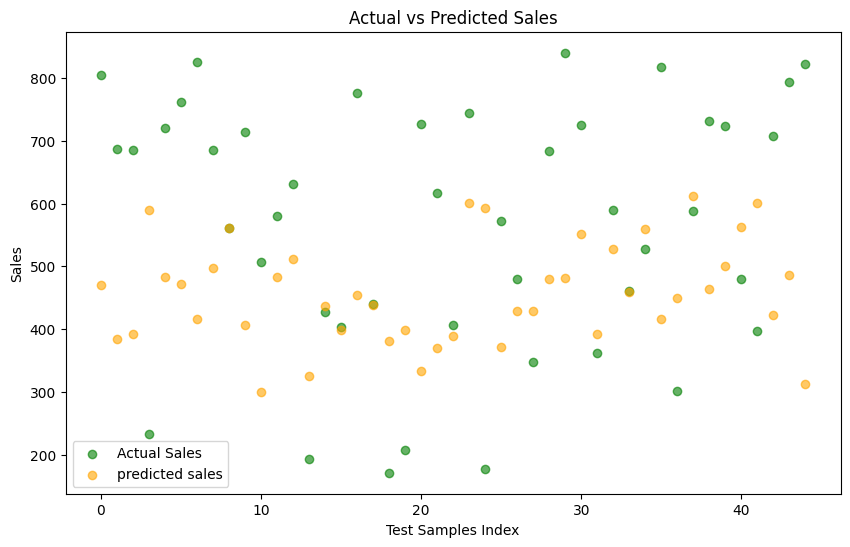

In [ ]:
#Visual actual vs predicted sales

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, label='Actual Sales', color='green', alpha = 0.6)
plt.scatter(range(len(y_pred)), y_pred, label='predicted sales', color='orange', alpha=0.6)
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Samples Index')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Predict Sales on new custom data

#New sample data for prediction
new_data=pd.DataFrame({
    'Promotion_Budget':[120,350],
    'Customer_Footfall':[450,700],
    'Store_Location_East':[0,1],
    'Store_Location_North':[0,0],
    'Store_Location_South':[0,0],
    'Store_Location_West':[0,0],
})

#Ensure new_data columns match the training data columns
#The order of columns matters
#Get the list of columns from the training data(excluding the data index now)
train_columns =X_train.columns

#Rendex new_data to match the columns order and presenc of training data
#This handles cares where columns might be missing or in a different order
new_data = new_data.reindex(columns=train_columns, fill_value=0)

future_sales = model.predict(new_data)
print("Predicted Future Sales:", future_sales)


Predicted Future Sales: [588.53566583 448.68135861]
